# HR Analytics

## A walkthrough guide on how Data Analytics and Machine Learning can support HR 

### Case study - Predicting Employee Turnover

Many problems in HR could be solved using a data driven or automation approach. Screening CVs of job candidates, evaluating employees performance, learning and development; HR Analytics is a field to be explored as it is fairly new.


> _HR analytics is the systematic identification and quantification of the people drivers of business outcomes_ (Heuvel & Bondarouk, 2016).


Overall, HR Analytics, or People Analytics, helps the area in making better, more accurate decision using data to support it. For it to happen, it is vital to also have a proper HR Data Management, a robust Data Warehouse where it is possible to combine information from different HR Systems and a proper HR Master Data Management in place.

In the following work, I will concentrate in one of the most costly problems HR faces: employee turnover. Recruiting and training a new employee requires staff time and money. Not only that, talented employees are not trivial to recruit. People are what drive a business so it is important to develop strategies in order to retain our valuable employees.


> _Some studies (such as SHRM) predict that every time a business replaces a salaried employee, it costs 6 to 9 months’ salary on average. For a manager making 40,000 a year, that's 20,000 to 30,000 in recruiting and training expenses._ (PeopleKeep.com)

To develop this project, I used a sample HR data created by Data Scientists of IBM. The data can be found in the link bellow:

[Click here for the dataset](https://www.ibm.com/communities/analytics/watson-analytics-blog/hr-employee-attrition/)

The analysis process is consisted of those main steps:

- Describing, manipulating and analysing the dataset
- Predicting employee turnover using different Machine Learning methods
- Evaluating and selecting the best method
- Tuning the selected method
- Further investigation of the more relevant features in employee turnover
- Insights on how to improve in each of those features

## Data Cleaning

Data cleaning, or cleansing, is a process in which you go through all of the data within a database and either remove or update information that is incomplete, incorrect, improperly formatted, duplicated, or irrelevant. It is an important form of data management and it is usually done in bulk process either regularly or as a one-off process using a technology with the relevant capabilities. This process is important because it improves the data quality and, in consequence, it is a more productive and reliable information. Also, data can come in different shapes and forms. Sometimes it will be a JSON file, or you would even need to web scrap the data. So it is important to make sure it is clean and properly formatted.

In this project, I used a sample HR data created by Data Scientists of IBM. The data is probably clean but I will go over some of the best practices when cleaning and preparing your dataset.

In [1]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display_html 

In [2]:
#Loading the dataset
hr_dirty = pd.read_excel("hrdata.xlsx")
hr_dirty.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### The cleaning process

In this part, I will go through some best case practices and general ideas of how to clean a dataset. It is important to note that there are multiple ways to approach this step and it will always be different from dataset to dataset. 

In [3]:
#Info description
hr_dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

The .info() method is one of the best ways to check different attributions of the data. 

For example, in this specific case, there are no missing values (all columns have 1470 observations and it matches with our RangeIndex). Also, all numeric columns are already integer, so there will be no need to transform them. 

All other columns are object type (which allow variable string length or any object like lists or dictionaries). It is also important to note here that it is possible to take an educated guess which of those columns have categorical or numerical values.

In [4]:
#Shape
print(hr_dirty.shape)

(1470, 35)


In [5]:
#Dtypes
hr_dirty.columns.to_series().groupby(hr_dirty.dtypes).groups

{dtype('int64'): Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
        'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
        'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'],
       dtype='object'),
 dtype('O'): Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
        'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
       dtype='object')}

In [6]:
#Checking for null values
hr_dirty.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

The codes above are different ways you could use to check your data and I would give a special attention to both method chaining, one grouping all columns with same data type together creating a very easy way to visualize where probably are your categorical and numerical data and the summing missing values as sometimes it can be tricky to identify missing values with the .info() method, specially the amount in each of our columns.

At this point, you will be taking decisions on what to do with your data. If you found any missing value, you will have to investigate what you could do with it (drop, substitute, ignore). The same goes to the data types and overall structure of the data. In this specific, and not very realistic, scenario the data is mostly ready.

In [7]:
#Re-arrange the columns
cols = list(hr_dirty.columns.values)
print(cols)

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [8]:
#Save the columns
col1 = list(hr_dirty['Attrition'])
col2 = list(hr_dirty['EmployeeNumber'])

In [9]:
#Redefine order
hr_df = hr_dirty.drop(['Attrition','EmployeeNumber'], axis = 1)
hr_df.insert(0, 'EmployeeNumber', col2)
hr_df.insert(34, 'Attrition', col1)
hr_df

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,2,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,80,1,10,3,3,10,7,1,7,No
2,4,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,Yes
3,5,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,80,0,8,3,3,8,7,3,0,No
4,7,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,80,1,6,3,3,2,2,2,2,No
5,8,32,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,4,...,80,0,8,2,2,7,7,3,6,No
6,10,59,Travel_Rarely,1324,Research & Development,3,3,Medical,1,3,...,80,3,12,3,2,1,0,0,0,No
7,11,30,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,4,...,80,1,1,2,3,1,0,0,0,No
8,12,38,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,4,...,80,0,10,2,3,9,7,1,8,No
9,13,36,Travel_Rarely,1299,Research & Development,27,3,Medical,1,3,...,80,2,17,3,2,7,7,7,7,No


In [68]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
EmployeeNumber              1470 non-null int64
Age                         1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate            

It is clear that "EmployeeNumber", in this dataset, is a unique identificator of the employee and, for convention, this is normally the first column. Also, as "Attrition" will be the target of the Machine Learning model, I will move it to the end just to facilitate our data manipulation. 

## Performing EDA - Exploratory Data Analysis

Before preparing our data and throwing it into a Machine Learning algorithm, it is good to understand the data you are dealing with. This step is important not only to check the quality of the data, but also to understand the main differences of an employee who left or stayed in the company (as it is exactly what I want to predict) and compare our "real life" situation to the future Machine Learning prediction. Also, it is crucial for Feature Engineering (which is the process of adding more relevant features taking into consideration not only the current dataset but also your domain expertise and the relevance of each feature for our Machine Learning algorithm).

Important considerations when performing an EDA for Machine Learning are, for example, making sure the features are relevant for what you want to predict, the size of the dataset, which features are categorical or numerical, identifying outliers (and how the model would deal with it), performing overall data manipulation and so on.

### Different Approach on Numerical and Categorical Data

There are several ways to explore a dataset. Always keep in mind what questions you want to solve and already start thinking about what kind of tables, and graphs, you would need in order to visualize what you are looking for.

In this case, the objective is to check the main differences of employees staying and employees leaving the company. I decided to look into the numerical and the categorical data in separate for a better understanding of its difference.

### Handling Numerical Data

Numerical data is information that can be described solely by a set of actual numbers. It can be discrete, taking only integer values, basically representing information that can be categorized into a classification; or continuous, a quantitative data that is used to measure something.

In [10]:
#Overview of the data
hr_grouped = round(hr_df.groupby('Attrition').agg(['mean', 'median','min', 'max']).T,2)
#Removing 'EmployeeNumber' from the visualization
hr_grouped.iloc[4:,:]

Attrition                            No      Yes
Age                     mean      37.56    33.61
                        median    36.00    32.00
                        min       18.00    18.00
                        max       60.00    58.00
DailyRate               mean     812.50   750.36
                        median   817.00   699.00
                        min      102.00   103.00
                        max     1499.00  1496.00
DistanceFromHome        mean       8.92    10.63
                        median     7.00     9.00
                        min        1.00     1.00
                        max       29.00    29.00
Education               mean       2.93     2.84
                        median     3.00     3.00
                        min        1.00     1.00
                        max        5.00     5.00
EmployeeCount           mean       1.00     1.00
                        median     1.00     1.00
                        min        1.00     1.00
                        max        1.00     1.00
EnvironmentSatisfaction mean       2.77     2.46
                        median     3.00     3.00
                        min        1.00     1.00
                        max        4.00     4.00
HourlyRate              mean      65.95    65.57
                        median    66.00    66.00
                        min       30.00    31.00
                        max      100.00   100.00
JobInvolvement          mean       2.77     2.52
                        median     3.00     3.00
...                                 ...      ...
StockOptionLevel        min        0.00     0.00
                        max        3.00     3.00
TotalWorkingYears       mean      11.86     8.24
                        median    10.00     7.00
                        min        0.00     0.00
                        max       38.00    40.00
TrainingTimesLastYear   mean       2.83     2.62
                        median     3.00     2.00
                        min        0.00     0.00
                        max        6.00     6.00
WorkLifeBalance         mean       2.78     2.66
                        median     3.00     3.00
                        min        1.00     1.00
                        max        4.00     4.00
YearsAtCompany          mean       7.37     5.13
                        median     6.00     3.00
                        min        0.00     0.00
                        max       37.00    40.00
YearsInCurrentRole      mean       4.48     2.90
                        median     3.00     2.00
                        min        0.00     0.00
                        max       18.00    15.00
YearsSinceLastPromotion mean       2.23     1.95
                        median     1.00     1.00
                        min        0.00     0.00
                        max       15.00    15.00
YearsWithCurrManager    mean       4.37     2.85
                        median     3.00     2.00
                        min        0.00     0.00
                        max       17.00    14.00

[100 rows x 2 columns]

Here I created a MultiIndex, or Hierarchical, dataframe. Arranging the data this way enables you to work with higher dimentional data while using the structure of a simple dataframe or series in Pandas. That is the approach I decided to take for most of the analysis throught the project as I believe it is a very powerful way to look through your data, specially if you want to compare the statistics of a categorical column with few unique values against multiple numerical columns, even saving the need of construct some visualization plots for exploration and having the advantage of checking the value itself as, sometimes, a plot can be made in a way that misleads you in taking conclusion that are not necessarily true. If the table gets too big, you can slice and dice it using the index to search for an specific attribute.

The decision for mean and median is because the mean score usually provides a better measure of central tendency, it is the average, while median is the data situated in the middle position of the set and is less affected by outliers and skewed data. Min and Max help in understanding how far the extremes are from the center. It is also recommended to check for the Standard Deviation or the Interquartile Range but in this case that would be enough, specially because I am working with a synthetic data.

As this dataset has too many columns to be displayed, I decided to create a Radar Plot where it is possible to clearly visualize the main differences in each of those attributes of employees staying and employees leaving the company. The code for the plot is down bellow.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


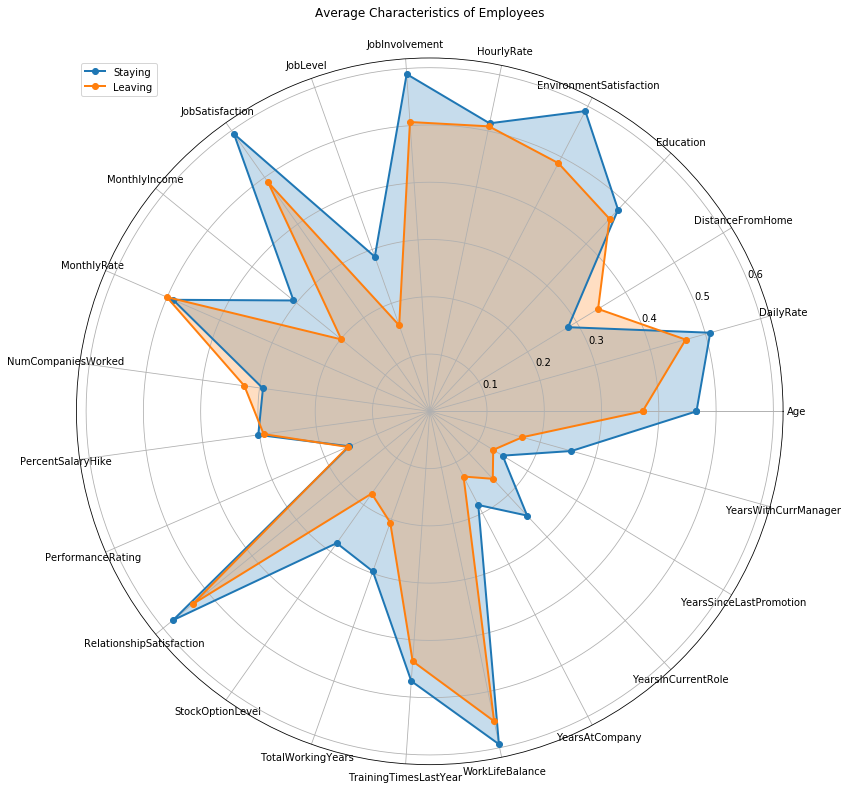

In [11]:
#Normalize data
spider_df = hr_df.select_dtypes(['number'])
spider_df = ((spider_df - spider_df.min())/(spider_df.max()-spider_df.min()))
spider_df['Attrition'] = hr_df['Attrition']

#Create the df
spider_df = spider_df.groupby('Attrition').mean()
#Remove unecessary columns
#StandardHours has just one unique value
spider_df = spider_df.drop(columns = (['EmployeeNumber', 'EmployeeCount', 'StandardHours']))
labels = np.array(spider_df.columns)


#Get the data
stats_no = spider_df.iloc[0,:]
stats_yes = spider_df.iloc[1,:]

#Calculations1
angles1 = np.linspace(0, 2*np.pi, len(labels), endpoint = False)
stats_no = np.concatenate((stats_no, [stats_no[0]]))
angles1 = np.concatenate((angles1,[angles1[0]]))


#Plot1
fig = plt.figure(figsize = (25,13))
ax = fig.add_subplot(111, polar = True)
ax.plot(angles1, stats_no, 'o-', linewidth = 2, label = "Staying")
ax.fill(angles1, stats_no, alpha = 0.25)
ax.set_thetagrids(angles1 * 180/np.pi, labels)
ax.grid(True)

#Calculations2
angles2 = np.linspace(0, 2*np.pi, len(labels), endpoint = False)
stats_yes = np.concatenate((stats_yes, [stats_yes[0]]))
angles2 = np.concatenate((angles2,[angles2[0]]))


#Plot2
ay = fig.add_subplot(111, polar = True)
ay.plot(angles2, stats_yes, 'o-', linewidth = 2, label = 'Leaving')
ay.fill(angles2, stats_yes, alpha = 0.25)



plt.title('Average Characteristics of Employees')
plt.legend()
plt.savefig('Radar.png')
plt.show()

The Radar Chart is a very good way to plot one to many relationships. Plotting the values of staying and leaving employees against each other gives a good picture of some specific attributes that were expected to have a different average, for example "Monthly Salary" or "Years Since Last Promotion", but also interesting or surprising ones such as "Environment Satisfaction" or "Distance from Home".

### Handling Categorical Data

Categorical data represents data that can be divided into groups. There are 2 kinds of categorical data: nominal (data with no intrinsic order) and ordinal (data that can be ranked or ordered).

The way I approached this analysis was, again, creating multiindex dataframes but, in this case, I wanted to see the difference in percentages on each of the attributes comparing an employee staying and an employee leaving the company. The use of percentage from the total is important because, as there are a lot more employees staying then leaving the company, this gives a more accurate measure to differentiate between them.

In [12]:
#Analysis our categorical features
hr_cat = hr_df.select_dtypes(['object'])
hr_cat.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Attrition
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes,No
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,No


In [13]:
#Business Travel Analysis
business = pd.DataFrame(hr_cat.groupby('Attrition').BusinessTravel.value_counts())
business.rename(columns = {'BusinessTravel':'Total'}, inplace = True)
business['Percent'] = round((business.div(business.sum(level=0), level=0)*100),2)

In [14]:
#Department Analysis
department = pd.DataFrame(hr_cat.groupby('Attrition').Department.value_counts())
department.rename(columns = {'Department':'Total'}, inplace = True)
department['Percent'] = round((department.div(department.sum(level=0), level=0)*100),2)

In [15]:
#Education Analysis
education = pd.DataFrame(hr_cat.groupby('Attrition').EducationField.value_counts())
education.rename(columns = {'EducationField':'Total'}, inplace = True)
education['Percent'] = round((education.div(education.sum(level=0), level=0)*100),2)

In [16]:
#Gender Analysis
gender = pd.DataFrame(hr_cat.groupby('Attrition').Gender.value_counts())
gender.rename(columns = {'Gender':'Total'}, inplace = True)
gender['Percent'] = round((gender.div(gender.sum(level=0), level=0)*100),2)

In [17]:
#Job Role Analysis
role = pd.DataFrame(hr_cat.groupby('Attrition').JobRole.value_counts())
role.rename(columns = {'JobRole':'Total'}, inplace = True)
role['Percent'] = round((role.div(role.sum(level=0), level=0)*100),2)

In [18]:
#Marital Status Analysis
marital = pd.DataFrame(hr_cat.groupby('Attrition').MaritalStatus.value_counts())
marital.rename(columns = {'MaritalStatus':'Total'}, inplace = True)
marital['Percent'] = round((marital.div(marital.sum(level=0), level=0)*100),2)

In [19]:
#Put data frames side by side for better visualization

df1_styler = business.style.set_table_attributes("style='display:inline'").set_caption('Gender')
df2_styler = department.style.set_table_attributes("style='display:inline'").set_caption('Marital Status')
df3_styler = education.style.set_table_attributes("style='display:inline'").set_caption('Department')
df4_styler = marital.style.set_table_attributes("style='display:inline'").set_caption('Job Role')
df5_styler = role.style.set_table_attributes("style='display:inline'").set_caption('Education Field')
df6_styler = gender.style.set_table_attributes("style='display:inline'").set_caption('Business Travel')


display_html(df6_styler._repr_html_()+df4_styler._repr_html_()+df2_styler._repr_html_()\
             +df5_styler._repr_html_()+df3_styler._repr_html_()+df1_styler._repr_html_(), raw=True)

Business Travel 
 
 
 
 Total 
 Percent 
 
 Attrition 
 Gender 
 
 
 
 
 No 
 Male 
 732 
 59.37 
 
 Female 
 501 
 40.63 
 
 Yes 
 Male 
 150 
 63.29 
 
 Female 
 87 
 36.71 
 
 
 Job Role 
 
 
 
 Total 
 Percent 
 
 Attrition 
 MaritalStatus 
 
 
 
 
 No 
 Married 
 589 
 47.77 
 
 Single 
 350 
 28.39 
 
 Divorced 
 294 
 23.84 
 
 Yes 
 Single 
 120 
 50.63 
 
 Married 
 84 
 35.44 
 
 Divorced 
 33 
 13.92 
 
 
 Marital Status 
 
 
 
 Total 
 Percent 
 
 Attrition 
 Department 
 
 
 
 
 No 
 Research & Development 
 828 
 67.15 
 
 Sales 
 354 
 28.71 
 
 Human Resources 
 51 
 4.14 
 
 Yes 
 Research & Development 
 133 
 56.12 
 
 Sales 
 92 
 38.82 
 
 Human Resources 
 12 
 5.06 
 
 
 Education Field 
 
 
 
 Total 
 Percent 
 
 Attrition 
 JobRole 
 
 
 
 
 No 
 Sales Executive 
 269 
 21.82 
 
 Research Scientist 
 245 
 19.87 
 
 Laboratory Technician 
 197 
 15.98 
 
 Manufacturing Director 
 135 
 10.95 
 
 Healthcare Representative 
 122 
 9.89 
 
 Manager 
 97 
 7.87 
 
 Research Director 
 78 
 6.33 
 
 Sales Representative 
 50 
 4.06 
 
 Human Resources 
 40 
 3.24 
 
 Yes 
 Laboratory Technician 
 62 
 26.16 
 
 Sales Executive 
 57 
 24.05 
 
 Research Scientist 
 47 
 19.83 
 
 Sales Representative 
 33 
 13.92 
 
 Human Resources 
 12 
 5.06 
 
 Manufacturing Director 
 10 
 4.22 
 
 Healthcare Representative 
 9 
 3.8 
 
 Manager 
 5 
 2.11 
 
 Research Director 
 2 
 0.84 
 
 
 Department 
 
 
 
 Total 
 Percent 
 
 Attrition 
 EducationField 
 
 
 
 
 No 
 Life Sciences 
 517 
 41.93 
 
 Medical 
 401 
 32.52 
 
 Marketing 
 124 
 10.06 
 
 Technical Degree 
 100 
 8.11 
 
 Other 
 71 
 5.76 
 
 Human Resources 
 20 
 1.62 
 
 Yes 
 Life Sciences 
 89 
 37.55 
 
 Medical 
 63 
 26.58 
 
 Marketing 
 35 
 14.77 
 
 Technical Degree 
 32 
 13.5 
 
 Other 
 11 
 4.64 
 
 Human Resources 
 7 
 2.95 
 
 
 Gender 
 
 
 
 Total 
 Percent 
 
 Attrition 
 BusinessTravel 
 
 
 
 
 No 
 Travel_Rarely 
 887 
 71.94 
 
 Travel_Frequently 
 208 
 16.87 
 
 Non-Travel 
 138 
 11.19 
 
 Yes 
 Travel_Rarely 
 156 
 65.82 
 
 Travel_Frequently 
 69 
 29.11 
 
 Non-Travel 
 12 
 5.06

I decided to display all dataframes together as it facilitates our data exploration. Interesting points to take from this quick analysis are how people working on the sales department or having the job role of a "Laboratory Technician" are more propense in leaving the company. Another interesting point to mention is in regards Business Travel. While some people really values a position that requires frequent travels, the data tell us that those are also the ones with a higher percentage of leaving the company.

For those interesting findings, both in categorical and numerical values, I could go deeper to understand it a bit more, formulating some hypothesis and crossing those dataframes against each other. Maybe employees travelling frequent are more propense to leave because they are in a specific age where they don't value it anymore. Maybe people living far from work are leaving the company because they are also the ones in specific positions that requires more over time and this commuting becomes even more painful. In this specific project, I will focus my analysis on the main features pointed by our Machine Learning model as the main ones causing employee turnover. But I want to emphasize how valuable this kind of exploratory data analysis is for HR and how it should be done on a regular basis, and not only when you are developing a Machine Learning project, as it can give you very good insights about your employees that, in the end, are the most valuable assets of your organization.

### Correlation Matrix

Correlation Matrix is a table showing correlation coeficient between sets of variables. Each cell in the table shows the correlation between two variables. As it is a symmetrical matrix, the top part of the graph was "removed" for a better visualization and it was colored in a way where you can easily spot variables with high positive correlation but also high negative correlation as well. In the end, I also took the values of the high positive and negative correlations.

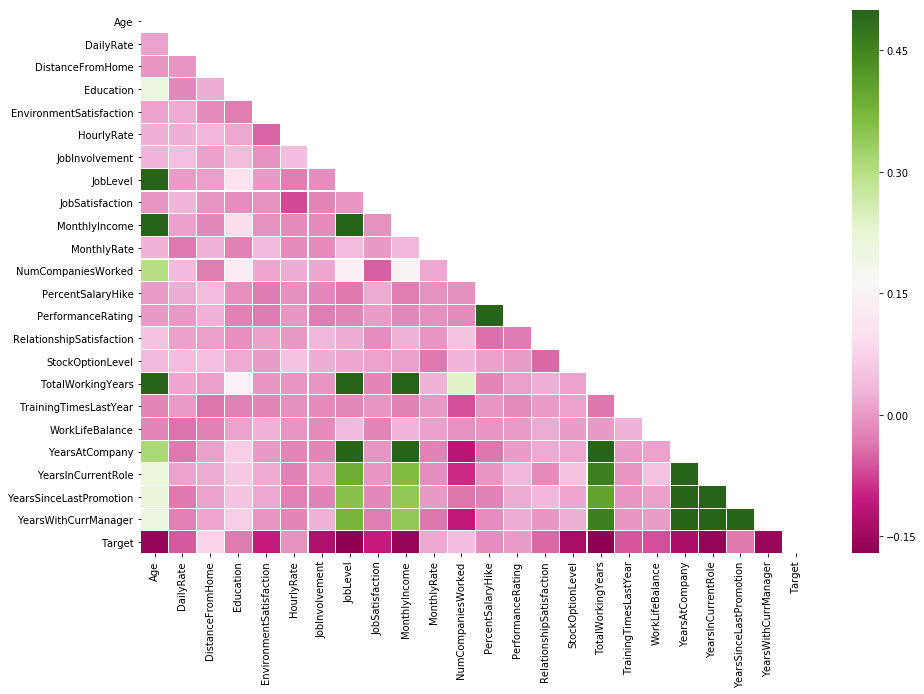

In [20]:
#Calculate correlations
import seaborn as sns

hr_df_trans = hr_df.copy()
#Transforming "Attrition" in "Target" with values 1 and 0 instead of "Yes" and "No"
hr_df_trans['Target'] = hr_df_trans['Attrition'].apply(lambda x:0 if x=='No' else 1)
#Removing unecessary columns
hr_df_trans = hr_df_trans.drop(['Attrition','EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)

corr = hr_df_trans.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

#Heatmap
plt.figure(figsize = (15,10))
sns.heatmap(corr, vmax = 0.5, mask = mask, linewidths = 0.1, cmap = 'PiYG')
plt.show()

It is interesting to see some of those attributes we analysed in our data exploration appearing with significant correlation here such as "Monthly Rate" or "Distance from Home".

### Turnover Rate

In [21]:
#Get the total number of observations
n_employees = len(hr_df)

#Calculate percentage of employees who stayed/left

turnover_rate = hr_df["Attrition"].value_counts()/len(hr_df)*100

print(f'The percentage of employees kept was {round(turnover_rate[0],2)}%')
print(f'The percentage of employees left was {round(turnover_rate[1],2)}%')

The percentage of employees kept was 83.88%
The percentage of employees left was 16.12%


Last, but not least, it is important to check what is our real turnover rate at this moment. Understanding the current scenario will help you to understand how relevant the Machine Learning algorithm will be.

## Machine Learning

### Transforming categorical variables

Most machine learning algorithms require data to be formatted in a very specific way, so datasets generally require some amount of preparation before they can yield useful insights.

In this case, I will have to handle our categorical variables. There are many ways to handle this step and the most common would be using a combinaton of "Label Encoder" and "One Hot Encoder" from the Scikit-learn. I will be Label Encoding our target and using the "get_dummies" function from Pandas in order to do this manipulation.

About Scikit-lean, it is probably the most popular library for Machine Learning in Python. It not only provides a wide range of supervised and unsupervised learning algorithms that can handle Classification, Regression, Clustering but also facilitates a lot the data manipulation.

In [22]:
#Dummify categorical values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
#Default converts to uint8
hr_dummy = hr_dummy = pd.get_dummies(hr_df, dtype = 'int64')

#Dropping columns to be labeled
hr_dummy.drop(['Attrition_Yes', 'Attrition_No'], axis = 1, inplace = True)

#Adding columns back to the df
hr_dummy['Attrition'] = le.fit(hr_df['Attrition']).transform(hr_df['Attrition'])

hr_dummy.head()
                                                

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes,Attrition
0,1,41,1102,1,2,1,2,94,3,2,...,0,1,0,0,0,1,1,0,1,1
1,2,49,279,8,1,1,3,61,2,2,...,1,0,0,0,1,0,1,1,0,0
2,4,37,1373,2,2,1,4,92,2,1,...,0,0,0,0,0,1,1,0,1,1
3,5,33,1392,3,4,1,4,56,3,1,...,1,0,0,0,1,0,1,0,1,0
4,7,27,591,2,1,1,1,40,3,1,...,0,0,0,0,1,0,1,1,0,0


In [23]:
#Checking Label Encoder
le.classes_

array(['No', 'Yes'], dtype=object)

In [24]:
print(hr_dummy.columns)

Index(['EmployeeNumber', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobR

## Feature Selection

Feature selection is the process of selecting a subset of relevant features (variables, predictors) for use in model construction. In a real life project, Feature Selection not only happens in our preprocessing but it could also be recursive, meaning trying to optimize the algorithm by eliminating and raking features until it finds the optimal configuration.

In this step, I will do two things. First, for the columns with just 2 options that was "dummified" I will eliminate one of them, as, for example, if "Over time" was a "Yes or No" category, it could be handled by one column with 1s and 0s and the other column would be redundant. If I had manipulated the data with Label Encoder in conjunction with One Hot Encoder this step wouldn't be necessary.

Also, I decided to remove features that are showing the exact same measure but in different ways. In my understanding of the dataset, "Daily Rate", "Hourly Rate" and "Monthly Rate" are all basically breaking down how much an employee earns and this is already described in "Monthly Income". Maybe it is not, and those are totally different attributes but, as I do not have the description of each attribute, that is the approach I decided to take.

In [25]:
#Remove unecessary data
cols_remove = ['DailyRate','EmployeeNumber', 'EmployeeCount', 'HourlyRate', 'MonthlyRate', 'StandardHours',\
               'Gender_Female', 'Over18_Y', 'OverTime_No']
hr = hr_dummy.drop(columns = cols_remove)
hr.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Attrition
0,41,1,2,2,3,2,4,5993,8,11,...,0,0,0,1,0,0,0,1,1,1
1,49,8,1,3,2,2,2,5130,1,23,...,0,0,1,0,0,0,1,0,0,0
2,37,2,2,4,2,1,3,2090,6,15,...,0,0,0,0,0,0,0,1,1,1
3,33,3,4,4,3,1,3,2909,1,11,...,0,0,1,0,0,0,1,0,1,0
4,27,2,1,1,3,1,2,3468,9,12,...,0,0,0,0,0,0,1,0,0,0


## Feature Scaling

The most common scenario is to have features highly varying in magnitudes, units and ranges. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations, this is an issue that needs to be covered.

There are different ways to handle this step. I decided to use the MinMaxScaler, it preserves the shape of the original distribution, although it supresses the effect of outliers, different from the StandardScaler for example.

I will use the data to train different Machine Learning algorithms but, if you are working only with "Tree Based Models", this step is not needed as they are invariant to monotonic transformations of any feature, input or independent variable.

In [26]:
from sklearn.preprocessing import MinMaxScaler

#Create the scaler
#Using the standard (0,1) range
scaler = MinMaxScaler(feature_range=(0, 1))

#Apply
hr_col = list(hr.columns)
hr_col.remove('Attrition')
for col in hr:
    hr[col] = hr[col].astype(float)
    hr[[col]] = scaler.fit_transform(hr[[col]])
hr['Attrition'] = pd.to_numeric(hr_dummy['Attrition'], downcast='float')
hr.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Attrition
0,0.547619,0.000000,0.25,0.333333,0.666667,0.25,1.000000,0.262454,0.888889,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1,0.738095,0.250000,0.00,0.666667,0.333333,0.25,0.333333,0.217009,0.111111,0.857143,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.452381,0.035714,0.25,1.000000,0.333333,0.00,0.666667,0.056925,0.666667,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,0.357143,0.071429,0.75,1.000000,0.666667,0.00,0.666667,0.100053,0.111111,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.214286,0.035714,0.00,0.000000,0.666667,0.00,0.333333,0.129489,1.000000,0.071429,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Splitting the data

The idea of a train/test split in our data is ensuring model generalization, which means avoid overfitting, an error that occurs when the model works well enough for the dataset it was developed, but not useful with new data. 

In this method, you develop your model using the training sample and try it out on the test sample later on and check its accuracy, how precise it was in its prediction. So, the train component is used to develop the model, while the test component is used to validate it.

Our goal is to predict employee turnover so the column "Attrition" will be our target and everything else will be the features that will help us in the prediction. Because we are dealing with a small data set, which is also common in HR reality, a 75%/25% split is enough.

In [27]:
#Split the data
#X is our features
#y is our target

X = hr.iloc[:,:-1]
y = hr['Attrition']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state=42)
#stratify splits the data in same proportion

X_train.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
22,0.380952,0.214286,0.75,0.000000,0.666667,0.50,0.333333,0.578462,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
74,0.428571,0.178571,0.50,0.333333,1.000000,0.00,1.000000,0.106846,0.333333,0.071429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1339,0.095238,0.214286,0.00,1.000000,0.666667,0.00,0.333333,0.077041,0.111111,0.857143,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
251,0.500000,0.035714,0.75,0.666667,0.666667,0.50,0.666667,0.522854,0.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1182,0.428571,0.000000,0.75,1.000000,0.333333,0.25,0.666667,0.177199,0.000000,0.285714,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Choosing the Machine Learning Model

What I want to accomplish is to have an algorithm that will learn from my historical data the important variables affecting the decision of leaving the company and use that information to predict turnover, a Supervised Learning. In our case, a binary Classification problem (turnover or not turnover), we could use several methods. I decided to test Logistic Regression, Decision Tree and Random Forest.

The main idea of a Logistic Regression is to find a relationsip between features and probability of a particular outcome. Different from the Linear Regression, which is used when the dependent variable is continuous and nature of regression line is linear, the Logistic Regression is used when the dependent variable is binary in nature.

Decision Tree, and their extension Random Forest, comprise in using a tree-like model of decisions and their possible consequences until it reaches the last leaf, where the prediction happens. One of the advantages of those methods is the ease in which we can see what features or variables contribute on the classification or regression and their importance. Tis information is relevant for HR to create a plan in order to improve, if possible, on rhose indicators and, in consequence, avoiding the turnover.

In [29]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 42, class_weight = 'balanced', solver = 'liblinear')
lr = lr.fit(X_train, y_train)
print(f'The Logistic Rgression score is {round((lr.score(X_test, y_test)*100),2)}%')

#Decision Tree
#Trying different values for best max_depth
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth = 2, random_state = 42)
dt = dt.fit(X_train, y_train)
print(f'The Decision Tree Classifier score is {round((dt.score(X_test, y_test)*100),2)}%')

#Random Forest
#Trying different values for best n_estimator
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150, random_state = 42)
rf = rf.fit(X_train, y_train)
print(f'The Random Forest Classifier score is {round((rf.score(X_test, y_test)*100),2)}%')

The Logistic Rgression score is 78.8%
The Decision Tree Classifier score is 83.7%
The Random Forest Classifier score is 84.24%


## Cross Validation

Cross validation is a technique for assuring that your models have got most of the patterns from the data correrct but is also low on bias and variance. It avoids overfitting and estimates the skill of a machine learning model.

I decided to use the K-Fold Cross Validation, which randomize the data set and split it into k groups. One of those groups is assigned to be the test data set, while the rest will be the training data set. It's accuracy is measured and this process repeats itself, taking the mean of the accuracies. I used the default of 10 splits, but, if you want, you could go deeper in checking the optimal number of splits.

In [30]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=42, shuffle=False)
           
for train_index, test_index in cv.split(X):
    X_train2, X_test2, y_train2, y_test2 = X.iloc[train_index], X.iloc[test_index],\
    y.iloc[train_index], y.iloc[test_index]

In [31]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_cv = LogisticRegression(random_state = 42, class_weight = 'balanced', solver = 'liblinear')
lr_cv = lr_cv.fit(X_train2, y_train2)
lr_cv_score = round((lr_cv.score(X_test2, y_test2)*100),2)
print(f'The Logistic Regression score is {round((lr_cv.score(X_test2, y_test2)*100),2)}%')

#Decision Tree
from sklearn import tree
dt_cv = tree.DecisionTreeClassifier(max_depth = 2, random_state = 42)
dt_cv = dt_cv.fit(X_train2, y_train2)
dt_cv_score = round((dt_cv.score(X_test2, y_test2)*100),2)
print(f'The Decision Tree Classifier score is {round((dt_cv.score(X_test2, y_test2)*100),2)}%')

#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_cv = RandomForestClassifier(n_estimators=150, random_state = 42, class_weight='balanced')
rf_cv = rf_cv.fit(X_train2, y_train2)
rf_cv_score = round((rf_cv.score(X_test2, y_test2)*100),2)
print(f'The Random Forest Classifier score is {round((rf_cv.score(X_test2, y_test2)*100),2)}%')

##Guessing parameters for all of them, it will be covered in hyperparameter tuning

The Logistic Regression score is 74.83%
The Decision Tree Classifier score is 84.35%
The Random Forest Classifier score is 89.8%


One could say that cross-validation decreased the accuracy of our Logistic Regression model, but that is not the correct way to read it. It is giving a better approximation of the real accuracy, including less overfitting. In the ideal scneario, if the data set was sufficiently large, I would take a split of the data and live it aside (completly untouched by training) and use it as an "independent" test dataset. As I am working with a small dataset, I choose to do not do it.

After our cross-validation, Random Forest was the method with highest accuracy. Accuracy give us a direction, but it doesn't provide information about separate classes. For example, if, without Machine Learning, I decided to classify all employees as "staying", I would have an 84% accuracy, which is our real turnover rate, but I would incorrecly classify all employees "leaving" the company and that is exactly what I want to focus on. As Decision Tree and Random Forest had a very  similar performance, I will go further and investigate recall and specificity of both in the Confusion Matrix.

## Confusion Matrix

A confusion matrix is one of the fastest ways to quickly look recall and precision of our algorithms. The target of our preduction is mostly identifying employees that are about to leave, so recall would be our most important metric, which means people that will leave the company and our algorithm is not able to predict. Higher values of recall means lower values of false negatives. If, in a different scenario, we were targeting employees that will stay, the focus would be the specifity for example.

Text(0.5, 257.44, 'Predicted label')

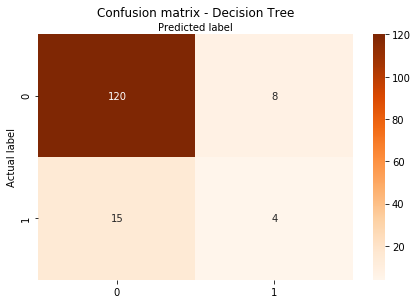

In [32]:
## Confusion Matrix Decision Tree
from sklearn.metrics import confusion_matrix

cnf_matrix_dt = confusion_matrix(y_test2, dt_cv.predict(X_test2))
class_names=[0,1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_dt), annot=True, cmap="Oranges" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Decision Tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

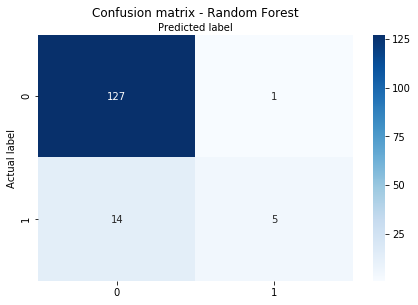

In [33]:
## Confusion Matrix Random Forest
from sklearn.metrics import confusion_matrix

cnf_matrix_rf = confusion_matrix(y_test2, rf_cv.predict(X_test2))
class_names=[0,1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_rf), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Reading the confusion matrix is simple and you have to look predict against actual. The (0,0) is the True Negative (TN) values while the (1,1) is the True Positive (TP) values. The top right corner is the False Positive (predicted "Yes" but it is actually a "No") and is also known as "Type I error" and the bottom left corner is the False Negative (predicted "No" but it is actually a "Yes") and is also knwon as "Type II error".

Looking at the confusion matrix, Random Forest is clearly having a better performance. To cross check this information, I will plot its ROC Curve showing how the recall vs precision relationship changes as the threshold varies for identifying a positive in our model. Right after we will calculate its AUC.

## AUC - ROC Curve (AUROC)

The AUC (Area under the Curve) ROC (Receiver Operating Characteristics) or AUROC is a performance measurament for Classification problem where it is possible to compare which of the used models predicts the class best. True Positive Rates (TPR) is plotted against False Positive Rates (FPR) and the AUC represents the entire two-dimensional area underneath the entire ROC curve from (0,0) to (1,1).

It is important to differentiate it from Accuracy as Accuracy measures, for a given threshold, the percentage of points correctly classified, regardless of which class they belong to and AUC measures the likelihood that given two random points — one from the positive and one from the negative class — the classifier will rank the point from the positive class higher than the one from the negative one.

There are also other ways to evaluate the skill of a prediction model, for example the Precision-Recall Curves, but I will be using AUROC in this particular work.

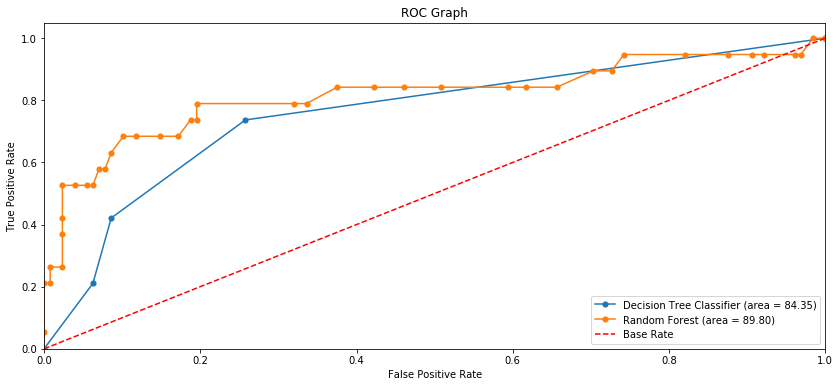

In [34]:
# Create ROC Graph
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test2, dt_cv.predict_proba(X_test2)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test2, rf_cv.predict_proba(X_test2)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Decision Tree Classifier (area = %0.2f)' % dt_cv_score,  marker = 'o', markeredgewidth = 0.1)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_cv_score, marker = 'o', markeredgewidth = 0.1)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate', linestyle = '--', color = 'red')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

With all this information, it is possible to say that Random Forest is the best performance model among the ones I tried. Now, let's take a look on how this model can be optimized for an even better performance.

## Random Forest - a closer look at the algorithm

The Decision Tree method aims to achieve as pure samples in the last leaves as possible. Two different rules are popular to achieve this task, Gini Impurity or Entropy. They are basically the same, but as Gini has an easier calculation, I will focus on it.

Gini impurity in Decision Trees measures how often a randomly chosen record from the dataset used to train the model will be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset (e.g., if half of the records in a group are "A" and the other half of records are "B", a record randomly labeled based on the composition of that group has a 50% chance of being labeled incorrectly). This measure is essentially the probability of a new record being incorrectly classified at a given node in a Decision Tree, based on the training data. Nodes with the greatest decrease in impurity happen at the start of the trees, while notes with the least decrease in impurity occur at the end of trees. Thus, by pruning trees below a particular node, we can create a subset of the most important features.

As the model selected is Random Forest, basically a conjunction of trees, it is calculated the Mean Decrease in Gini, which is a measure of variable importance for estimating a target variable. Variables are sorted and displayed in the Variable Importance Plot created for the random forest by this measure.

It is important to point out, as well, how Random Forest works. Your Random Forest is a collection of trees, and each time you run the model you'll end up with a slightly different set of trees, which means, changes in some metrics. That is a normal behaviour.

Random Forest is an ensemble learning method. It uses multiple algorithms to obtain better predictive performance. There are different kind of ensembles and Random Forest is a Bootstrap aggregating or Bagging. I am not going to deep dive into this topic but more information about what is Bagging and it is difference from Boosting, another ensemble learning method, you can find here:

[Difference between bagging and boosting](https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/)

I would also recommend if you want to understand more about the learning process of a Decision Tree to check the Wipedia page:

[Decision tree learning](https://en.wikipedia.org/wiki/Decision_tree_learning)

## Hyperparameter Tuning

The main idea of hyperparameter tuning is adjusting the several configurations of an algorithm in order to optimize performance. While the parameters are learned during training, such as slope and intercept in Linear Regression, hiperparameter must be set by the data scientist before training. Scikit-Learn set default values for some of them, but it doesn't mean those are always the correct ones for every case.

There are different ways one could approach the hyperparameter tuning problem and I decided to use the Grid Search method. A grid of hyperparameters is set and, for each combination, it trains a model and scores on the testing data. As it tries all possible combination you set in the grid, it can be costly in execution and computing power. Still, it is a very powerful way for optmizing the hyperparameters. As you will see in the code bellow, hyperparameter tuning relies on trying different values in order to find the optmal setting.

If you want a complete description of each parameter, I would recommend the Scikit-learn library of Random Forest:

[Sklearn Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [36]:
#Create the parameter dictionary
#Guessing a list of possible values for the parameters

parameters = {'n_estimators':[i for i in range (5,150,1000)],
               'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [i for i in range(5,21,1)], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }


# import the GridSearchCV function
from sklearn.model_selection import GridSearchCV


#Choose the type of classifier
clf = RandomForestClassifier(random_state = 0)

# initialize the param_search function using the GridSearchCV function, initial model and parameters above
param_search = GridSearchCV(clf, parameters)

# fit the param_search to the training dataset
grid_obj = param_search.fit(X_train2, y_train2)

# set the clf to the best combination of parameters
clf_gs = grid_obj.best_estimator_

# Fit the best algorithm to the data
clf_gs.fit(X_train2, y_train2)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

After Grid Search is conduced, you can check the output to understand what was the optimal parameters configuration found in the search. Still, there are several other deep optimizations you could do. Here is a link very detailed about hyperparameters in Random Forest:

[Optimizing Hyperparameters on Random Forest Classification](https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6)


Also, there are different ways to check it depending on your problem, from SVM Classifier to the Neural Network MLPClassifier. I am using the standard classification_report.

In [37]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = clf_gs[1]

f_names = list(X.columns)

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = f_names, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

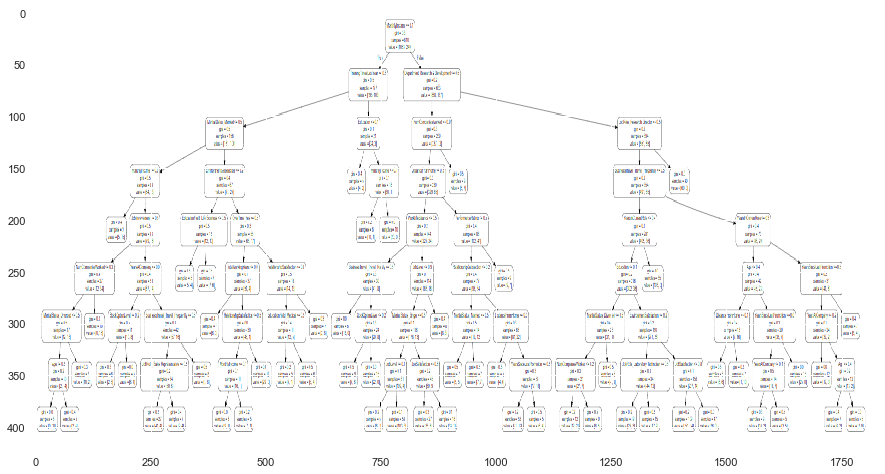

In [66]:
import matplotlib.image as mpimg

#Display one of the trees selected
img=mpimg.imread('tree.png')
fig, ax = subplots(figsize=(15,8))
imgplot = plt.imshow(img, aspect='auto')
plt.show()

In [39]:
from sklearn.metrics import classification_report

target_labels = list(le.classes_)
pred_rfc = clf_gs.predict(X_test2)

report = classification_report(y_test2,pred_rfc, target_names = target_labels, output_dict=True)
report_df = pd.DataFrame(report).T
report_df = report_df[['precision', 'recall', 'f1-score', 'support']]
round(report_df,2)

,precision,recall,f1-score,support
No,0.91,0.99,0.95,128.0
Yes,0.88,0.37,0.52,19.0
micro avg,0.91,0.91,0.91,147.0
macro avg,0.89,0.68,0.73,147.0
weighted avg,0.91,0.91,0.90,147.0


In [40]:
print(f'The Final Random Forest Classifier score is {round((clf_gs.score(X_test2, y_test2)*100),2)}%')

The Final Random Forest Classifier score is 91.16%


The model score improved, which is exactly what you want when doing the hyperparameter tunning. The model now can be saved for future use. Here, the model can help not only to predict employees about to leave the company, and how HR should act - if so - in such cases. This should be deeply discussed as it could be approached in different ways.

## Finding the Most Important Features

I believe that is an information you would be probably looking for after creating your model. Feature importance is useful to understand variables with best predictive powers, raise issues such as variables with too much importance compared to others and to update your model with new variables.

You can read more about Feature Importance in Random Forest here:

[Explaining Feature Importance by Example of a Random Forest](https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e)

For HR specifically it would be important to understand how each features affect the target, but it is not as simple as just displaying its ranking importance. First of all, after identifying the important features, it would be recommend to optimize it by using, for example, The Random Forest-Recursive Feature Elimination algorithm (RF-RFE) as the presence of correlated predictors can impact its ability to identify strong predictors. 

But it is good to keep in mind that it does not say if a feature contributes positve or negative to the target, it is just how important it was for the prediction. One of the solutions used in this case, to find out if a feature have a linear, monotonous or more complex relationship to a feature is to calculate the Partial Dependence Plot which would be something recommended.

Still, feature importance ranking in Random Forest can be extremely trick as the ranking can change slighthly. If you want to understand a bit deeper about the statistics behind, I would recommend StackExchange. Here is an interesting discussion:

[What are variable importance ranking useful for](https://stats.stackexchange.com/questions/202277/what-are-variable-importance-rankings-useful-for)

That being said, Feature Importance is still very relevant. With this information better analysed, you can go back to your original data to explore a bit more areas where you could maybe improve in those metrics. In the end of this project, I will show you a simple example how you could proceed again with the Exploratory Data Analysis.

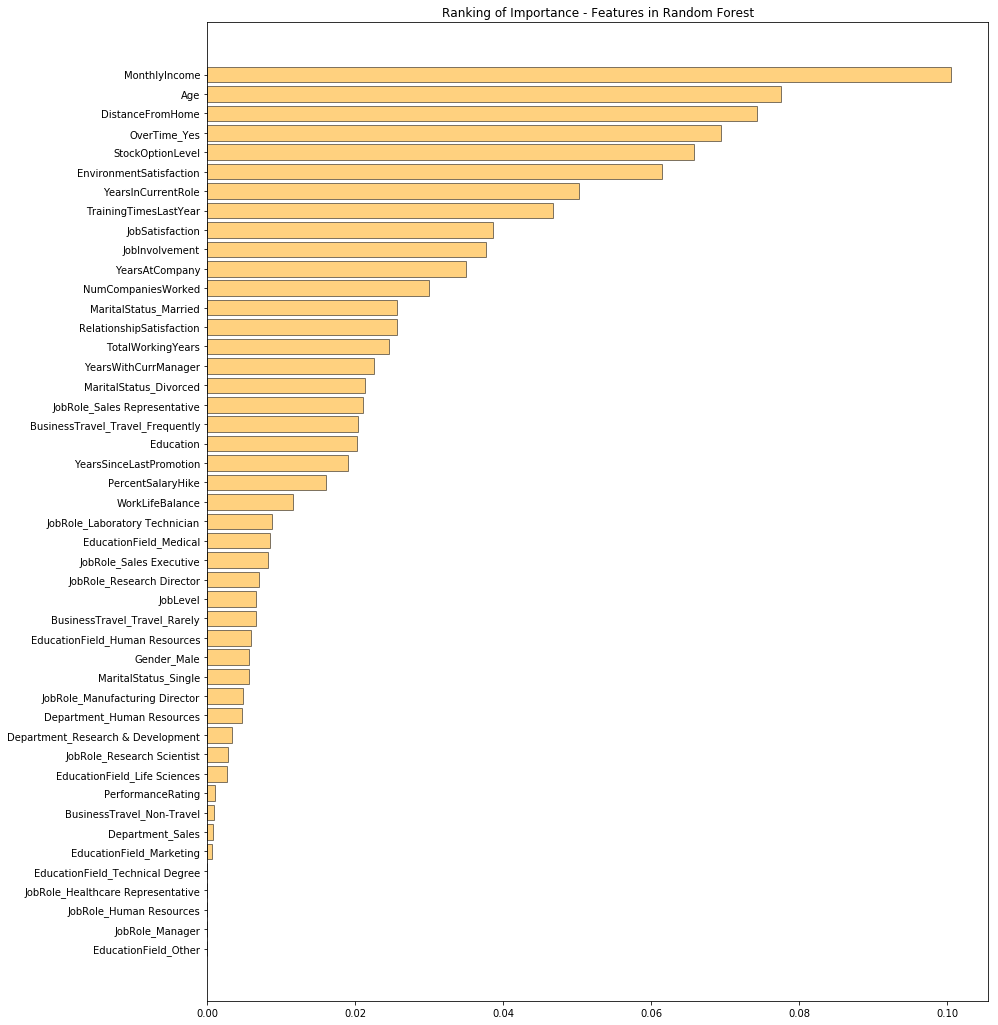

In [41]:
importances = clf_gs.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train2.columns[i] for i in indices]

# Plot
plt.figure(figsize=(14, 18))
plt.title("Ranking of Importance - Features in Random Forest")
plt.barh(range(X_train2.shape[1]), importances[indices], color = 'orange', edgecolor = 'black', alpha = 0.5,\
         align = 'center')
plt.yticks(range(X_train2.shape[1]), names)
plt.gca().invert_yaxis()
plt.show()

In [42]:
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])

for i in range(46):
    feat = X_train2.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,MonthlyIncome,0.100506
1,Age,0.077548
2,DistanceFromHome,0.074233
3,OverTime_Yes,0.069445
4,StockOptionLevel,0.065805
5,EnvironmentSatisfaction,0.061451
6,YearsInCurrentRole,0.050294
7,TrainingTimesLastYear,0.046730
8,JobSatisfaction,0.038571
9,JobInvolvement,0.037687


### Saving and Loading Model

You have multiple reasons for saving your model. Avoiding training it again, recreate the code, to share it with other people or compare the accuracy of multiple models. The saving part is called Serialization, the process of converting an object into a stream of bytes. Its main purpose is to save the state of an object in order to be able to create it when needed. The reverse process is called deserialization.

As you probably imagine, there are different libraries to do it. The 2 most popular, apparently, are joblib and pickle. In my research, it seems like joblib is not only faster but also facilitate to share memories between processes as it is possible to memory back uncompressed joblib-pickled data.

In [43]:
from sklearn.externals import joblib
import copy

#Deepcopy my model
finalmodel = copy.deepcopy(clf_gs)
#Saving in Pickle format
joblib.dump(finalmodel, 'finalmodel.pkl')

['finalmodel.pkl']

In [44]:
loaded_model = joblib.load('finalmodel.pkl')
result = loaded_model.score(X_test2, y_test2)
print(result)

0.9115646258503401


General best case practices after saving it is to take note of the Python version and libraries used versions for when you deserialize the saved model. Also, you might like to save the parameters of your model separatly so that you can use them directly in scikit-learn or another platform in the future.

### EDA of Important Features - Trying to Reduce our Turnover
#### Example of how to proceed

In the end, what you probably want is not only predict when the employee is about to leave, but how you can avoid valuable employees leaving the company. One strategy is trying to analyse the importat features for your model back on the original data as some insights can come up. I will take as an example how I would start approaching an EDA around "Monthly Income" and "Over Time".

It is very important to remind that HR deals with sensitive and this kind of analysis need to be discussed not only inside the team but also understand company policies on possible restrictions in regards dealing with employee information.

In [45]:
#Selecting the columns I want to analyse
selected = ['Age', 'BusinessTravel', 'Department','DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', \
'Gender', 'JobRole', 'JobSatisfaction', 'MaritalStatus','MonthlyIncome','NumCompaniesWorked','OverTime',\
'PerformanceRating', 'RelationshipSatisfaction','TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']

hr_slice = hr_df[selected]
hr_slice.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobRole,JobSatisfaction,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,Sales Executive,4,...,Yes,3,1,8,0,1,6,4,0,5
1,49,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,Research Scientist,2,...,No,4,4,10,3,3,10,7,1,7
2,37,Travel_Rarely,Research & Development,2,2,Other,4,Male,Laboratory Technician,3,...,Yes,3,2,7,3,3,0,0,0,0
3,33,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,Research Scientist,3,...,Yes,3,3,8,3,3,8,7,3,0
4,27,Travel_Rarely,Research & Development,2,1,Medical,1,Male,Laboratory Technician,2,...,No,3,4,6,3,3,2,2,2,2


In [46]:
##check salaries accross gender, departments and job role
breakincome_df = pd.DataFrame(hr_slice.groupby(['Gender','Department','JobRole']).MonthlyIncome.mean())
breakincome_df

MonthlyIncome
Gender Department             JobRole                                 
Female Human Resources        Human Resources              4540.687500
                              Manager                     18157.250000
       Research & Development Healthcare Representative    7433.803922
                              Laboratory Technician        3246.905882
                              Manager                     16628.333333
                              Manufacturing Director       7409.166667
                              Research Director           15144.484848
                              Research Scientist           3344.473684
       Sales                  Manager                     17016.263158
                              Sales Executive              6764.310606
                              Sales Representative         2671.947368
Male   Human Resources        Human Resources              4100.222222
                              Manager                     18049.428571
       Research & Development Healthcare Representative    7589.300000
                              Laboratory Technician        3232.413793
                              Manager                     17531.933333
                              Manufacturing Director       7182.671233
                              Research Director           16657.787234
                              Research Scientist           3173.044944
       Sales                  Manager                     16956.055556
                              Sales Executive              7033.123711
                              Sales Representative         2587.200000

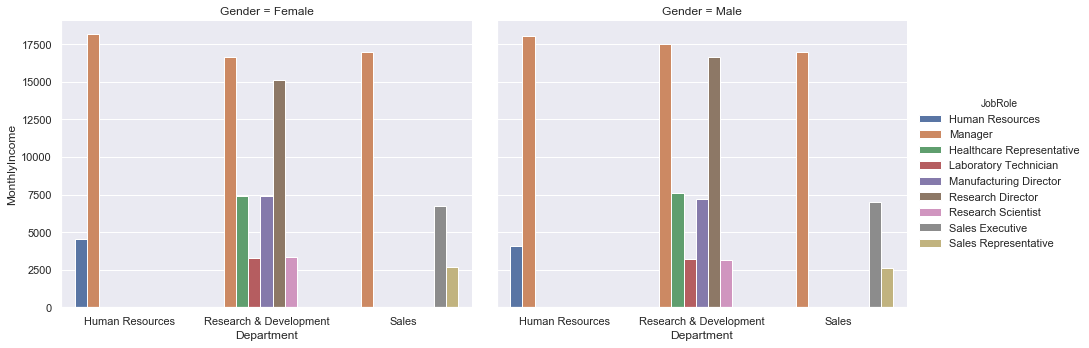

In [47]:
import seaborn as sns
income_plot = breakincome_df.reset_index()

sns.set(style = "darkgrid", palette = 'deep')
fg = sns.catplot(x = 'Department', y = 'MonthlyIncome', hue = 'JobRole', col = 'Gender',\
                       data = income_plot, kind = 'bar', aspect = 1.3)

In [48]:
#Create the df
overtime_df = pd.DataFrame(hr_slice.groupby(['OverTime','Department','JobRole']).OverTime.count())
overtime_df

OverTime
OverTime Department             JobRole                            
No       Human Resources        Human Resources                  39
                                Manager                           7
         Research & Development Healthcare Representative        94
                                Laboratory Technician           197
                                Manager                          41
                                Manufacturing Director          106
                                Research Director                57
                                Research Scientist              195
         Sales                  Manager                          27
                                Sales Executive                 232
                                Sales Representative             59
Yes      Human Resources        Human Resources                  13
                                Manager                           4
         Research & Development Healthcare Representative        37
                                Laboratory Technician            62
                                Manager                          13
                                Manufacturing Director           39
                                Research Director                23
                                Research Scientist               97
         Sales                  Manager                          10
                                Sales Executive                  94
                                Sales Representative             24

In [49]:
#Create a total column to be joined to your df
total_column = overtime_df.sum(level = 'JobRole')
total_column.rename(columns = {'OverTime':'Total Employees'}, inplace = True)
total_column

,Total Employees
JobRole,
Human Resources,52
Manager,102
Healthcare Representative,131
Laboratory Technician,259
Manufacturing Director,145
Research Director,80
Research Scientist,292
Sales Executive,326
Sales Representative,83


In [50]:
#Remove employees that are not in the company anymore
overtime = total_column.join(overtime_df.loc['Yes'])

#Create a column for total that didn't overtimed
overtime['No OverTime'] = overtime['Total Employees'] - overtime['OverTime']

#Calculate the percentage by department and job role that overtimed
overtime['Percentage of Overtimers'] = ((overtime['OverTime']/overtime['Total Employees'])*100).round(2)

#Sort higher to lower inside without messing with the multiindex
overtime.sort_values(['Department','Percentage of Overtimers'], ascending=[True,False])

Total Employees  OverTime  \
Department             JobRole                                                
Human Resources        Human Resources                         52        13   
                       Manager                                102         4   
Research & Development Research Scientist                     292        97   
                       Research Director                       80        23   
                       Healthcare Representative              131        37   
                       Manufacturing Director                 145        39   
                       Laboratory Technician                  259        62   
                       Manager                                102        13   
Sales                  Sales Representative                    83        24   
                       Sales Executive                        326        94   
                       Manager                                102        10   

                                                  No OverTime  \
Department             JobRole                                  
Human Resources        Human Resources                     39   
                       Manager                             98   
Research & Development Research Scientist                 195   
                       Research Director                   57   
                       Healthcare Representative           94   
                       Manufacturing Director             106   
                       Laboratory Technician              197   
                       Manager                             89   
Sales                  Sales Representative                59   
                       Sales Executive                    232   
                       Manager                             92   

                                                  Percentage of Overtimers  
Department             JobRole                                              
Human Resources        Human Resources                               25.00  
                       Manager                                        3.92  
Research & Development Research Scientist                            33.22  
                       Research Director                             28.75  
                       Healthcare Representative                     28.24  
                       Manufacturing Director                        26.90  
                       Laboratory Technician                         23.94  
                       Manager                                       12.75  
Sales                  Sales Representative                          28.92  
                       Sales Executive                               28.83  
                       Manager                                        9.80

There are a lot to be explored in this simple analysis. In regards monthly income, I believe the more practical way to check for any kind of imbalance would be to check it across gender and across same job role, inside the same department. Also, it is interesting to see same funcion, in this case "Manager" for example, across different departments. In our data, there are some differences in incomes, but the significance of it is hard to tell without a context.

On Over Time there is a more clear insight. Managers across departments have a significant low over time compared to other roles, and that is something that could be explored deeper. Another interesting fact would be, for example, why the R&D department has so many people working over time across job roles? It could give us a good estimation that maybe it is needed more employees in that department or even that people on that department are not being able to be productive during regular working hours. A further investigation is definetely needed.

## Extract/Transform/Load (ETL) Process - Loading the Data to the Warehouse

It is common that after extracting and working with your data, you would want to store it in your data warehouse for example and it will probably be loaded in a SQL based repository. As a demonstration, I will be loading the first dataset "hr_df" in the local data warehouse and it I will name it "f_hr", our fact table. A fact table is the central table in a star schema of a data warehouse. A fact table stores quantitative information for analysis and is often denormalized.

For more information in regards SQL database common practices you can find it here:
[SQL style guide by Simon Holywell](https://www.sqlstyle.guide/)

In [75]:
# Import the dependencies to conect with Mysql.

# SQL Alchemy
from sqlalchemy import create_engine

# PyMySQL 
import pymysql
pymysql.install_as_MySQLdb()

In [76]:
rds_connection_string = "<name>:<password>@127.0.0.1/hr_db"
engine = create_engine(f'mysql://{rds_connection_string}')

In [77]:
#Checking for table names in SQL database
engine.table_names()

['f_hr']

### Load Data

In [78]:
hr_df.to_sql(name='f_hr', con=engine, if_exists='append', index=False)

In [79]:
#Check if I could retrive data with SQL query
pd.read_sql_query('select * from f_hr', con=engine).head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,2,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,80,1,10,3,3,10,7,1,7,No
2,4,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,Yes
3,5,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,80,0,8,3,3,8,7,3,0,No
4,7,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,80,1,6,3,3,2,2,2,2,No


## Links and References

https://towardsdatascience.com/introducing-pdpbox-2aa820afd312

https://stackoverflow.com/questions/47106385/determine-why-features-are-important-in-decision-tree-models

https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

https://towardsdatascience.com/de-coding-random-forests-82d4dcbb91a1

https://medium.com/@monikapdb/employee-attrition-analysis-using-machine-learning-methods-73564358e87f

https://www.kaggle.com/dansbecker/partial-dependence-plots

https://medium.com/usf-msds/intuitive-interpretation-of-random-forest-2238687cae45

https://www.experian.co.uk/business/glossary/data-cleansing/

https://towardsdatascience.com/let-us-understand-the-correlation-matrix-and-covariance-matrix-d42e6b643c22

https://nonusingh.github.io/RandomForest

https://www.kaggle.com/cesartrevisan/scikit-learn-and-gridsearchcv

https://stackoverflow.com/questions/11498441/what-is-this-kind-of-assignment-in-python-called-a-b-true  

https://www.business-science.io/business/2017/09/18/hr_employee_attrition.html

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

https://www.kaggle.com/willkoehrsen/intro-to-model-tuning-grid-and-random-search 

https://towardsdatascience.com/predict-employee-turnover-with-python-da4975588aa3

https://towardsdatascience.com/building-an-employee-churn-model-in-python-to-develop-a-strategic-retention-plan-57d5bd882c2d
 
https://towardsdatascience.com/4-more-quick-and-easy-data-visualizations-in-python-with-code-da9030ab3429
 
https://www.kaggle.com/gsdeepakkumar/visualisation-with-python-hr-data

https://www.quora.com/Why-is-AUC-a-better-measure-of-an-algorithms-performance-than-accuracy

https://towardsdatascience.com/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184?gi=9dbf6e948b8a

https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e
 
https://stackoverflow.com/questions/31421413/how-to-compute-precision-recall-accuracy-and-f1-score-for-the-multiclass-case
 
https://towardsdatascience.com/the-7-steps-of-machine-learning-2877d7e5548e